# WEB SCRAPING


# IMPORTACION DE LIBRERIAS

In [26]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
import requests


# DESCARGA DE HTML

In [27]:


# Seleccionar el recurso a descargar
resource_url = "https://abacosuytec.com/suministros-y-consumibles-empresras/limpieza-higiene-ferreteria-industrial.html"

# Petición para descargar el fichero de Internet
response = requests.get(resource_url)
# Verificamos la respuesta
print("Estado:", response.status_code)


Estado: 200


# Transforma el html

In [ ]:
soup = BeautifulSoup(response.text, 'html')
names= soup.find_all(class_= "product-item-link")
prices = soup.find_all(class_= "price")
categorias = soup.find_all(class_= "ox-product-grid__categories")


# Procesa el html

In [29]:
precios = [float(price.get_text(strip=True).replace(',','.').replace('€','').strip()) for price in prices]
nombres = [nombre_producto.get_text(strip=True) for nombre_producto in names][1:31]
categoria = [nombre_categoria.get_text(strip=True) for nombre_categoria in categorias]

df = pd.DataFrame({
    'Categoria': categoria,
    'Nombre': nombres,
    'Precio': precios
})
df

,Categoria,Nombre,Precio
0,Limpieza e Higiene,BROCHA RADIADOR 15-30,4.86
1,Limpieza e Higiene,PINCEL ROTULAR 6,2.38
2,Limpieza e Higiene,MANGO CEPILLO BARRENDERO,3.85
3,Limpieza e Higiene,BROCHA PLANA DOBLE 12/25 MM,1.04
4,Limpieza e Higiene,PINCEL PLANO O REDONDO 18,2.57
5,Limpieza e Higiene,BROCHA RADIADOR 21-50,8.35
6,Limpieza e Higiene,PINCEL ROTULAR 10,3.58
7,Limpieza e Higiene,CEPILLO AUTOCAR 606 29 CM,17.50
8,Limpieza e Higiene,BROCHA PLANA DOBLE 18/40 MM,1.52
9,Limpieza e Higiene,PINCEL PLANO O REDONDO 24,4.69


# Almacena los datos en sqlite

In [35]:
conn = sqlite3.connect('mi_base_de_datos.db')
df.to_sql('productos', conn, if_exists='replace', index=False)
consulta = pd.read_sql_query("SELECT * FROM productos", conn)
print(consulta)

             Categoria                         Nombre  Precio
0   Limpieza e Higiene          BROCHA RADIADOR 15-30    4.86
1   Limpieza e Higiene               PINCEL ROTULAR 6    2.38
2   Limpieza e Higiene       MANGO CEPILLO BARRENDERO    3.85
3   Limpieza e Higiene    BROCHA PLANA DOBLE 12/25 MM    1.04
4   Limpieza e Higiene      PINCEL PLANO O REDONDO 18    2.57
5   Limpieza e Higiene          BROCHA RADIADOR 21-50    8.35
6   Limpieza e Higiene              PINCEL ROTULAR 10    3.58
7   Limpieza e Higiene      CEPILLO AUTOCAR 606 29 CM   17.50
8   Limpieza e Higiene    BROCHA PLANA DOBLE 18/40 MM    1.52
9   Limpieza e Higiene      PINCEL PLANO O REDONDO 24    4.69
10  Limpieza e Higiene              BROCHA PRENSADA 8   11.30
11  Limpieza e Higiene       GRAPA CEPILLO BARRENDERO    3.24
12  Limpieza e Higiene    BROCHA PLANA DOBLE 24/50 MM    2.25
13  Limpieza e Higiene              RODILLO LISO 12CM    5.15
14  Limpieza e Higiene             BROCHA PRENSADA 12   21.32
15  Limp

# Cuales son los productos que cuestan mas de 10 euros

In [36]:
consulta2 = pd.read_sql_query("SELECT Nombre, Precio FROM Productos WHERE Precio > 10.00", conn)
print(consulta2)
conn.close()

                          Nombre  Precio
0      CEPILLO AUTOCAR 606 29 CM   17.50
1              BROCHA PRENSADA 8   11.30
2             BROCHA PRENSADA 12   21.32
3    CEPILLO BARRENDERO 1532 430   20.26
4  RODILLO ESP.SUELOS 22/50 3390   11.45
5    CEPILLO BARRENDERO 1535 860   40.51
6              RODILLO ESPUMA 22   16.43
7  BROCHA PLANA TRIPLE 4"/100 MM   14.88
8       CEPILLO ESCOBIJO M.CORTO   10.70


# Visualizacion de los datos

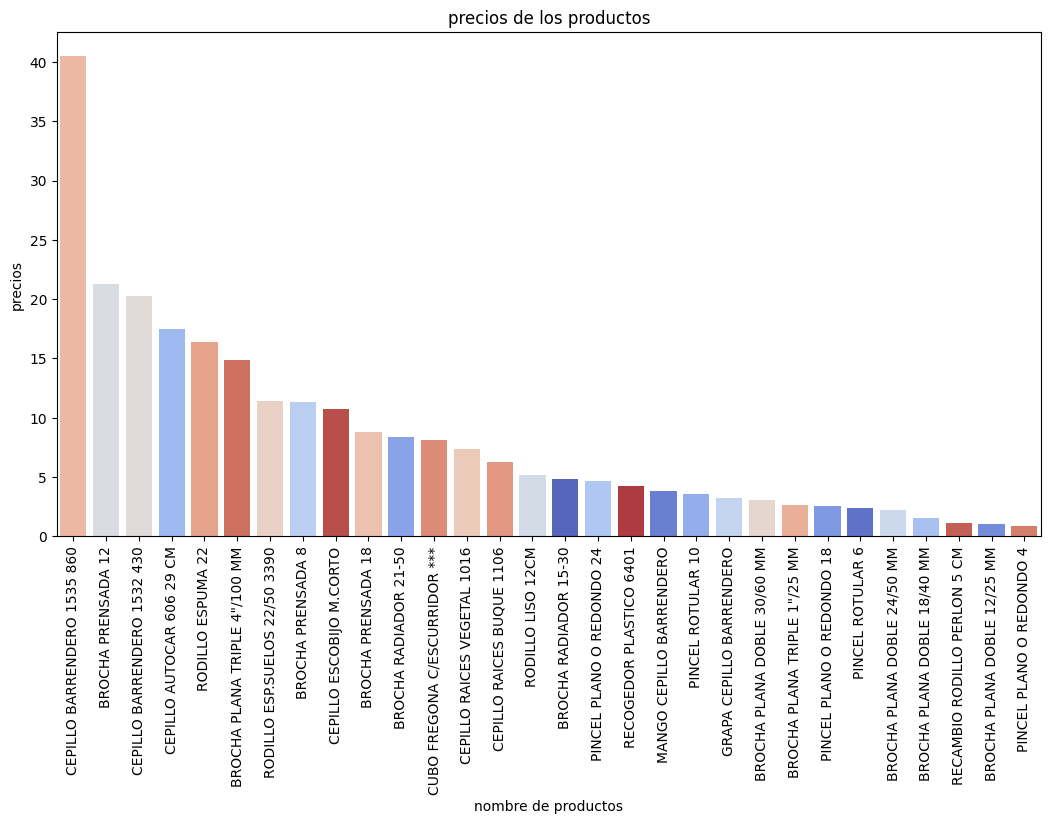

In [32]:

plt.figure(figsize=(12, 6))
# Crear orden basado en precios descendentes
order = df.sort_values('Precio', ascending=False)['Nombre']
sns.barplot(data=df, x="Nombre", y="Precio", hue="Nombre", order=order, palette="coolwarm", legend=False)
plt.title("precios de los productos")
plt.xlabel("nombre de productos")
plt.ylabel("precios")
plt.tight_layout()
# Rotar las etiquetas del eje x a 90 grados (vertical)
plt.xticks(rotation=90)
plt.show()